In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# 날씨 데이터 로드
weather = pd.read_csv("/content/weather.csv",encoding="euc-kr", skiprows=9)
# 가격 데이터 로드
price = pd.read_excel("/content/price.xlsx", encoding="utf16bom" )
price = price.drop(index=10)
# 바람 데이터 로드
humid = pd.read_csv("/content/humid.csv", encoding="euc-kr", skiprows=12)
# 기압 데이터 로드
airpression = pd.read_csv("/content/airpression.csv", encoding="euc-kr", skiprows=11)
# 일조 일사량 데이터 로드
solar = pd.read_csv("/content/solar_data.csv", encoding="euc-kr", skiprows=13)

In [357]:
# 타입 확인
weather.dtypes, price.dtypes, humid.dtypes, airpression.dtypes, solar.dtypes

(일시             object
 평균기온(℃)       float64
 최고기온 평균(℃)    float64
 최저기온 평균(℃)    float64
 강수량(mm)       float64
 price         float64
 dtype: object, 구분       int64
 1월     float64
 2월     float64
 3월     float64
 4월     float64
 5월     float64
 6월     float64
 7월     float64
 8월     float64
 9월     float64
 10월    float64
 11월    float64
 12월    float64
 연평균    float64
 dtype: object, 일시           object
 평균상대습도(%)     int64
 최소상대습도(%)     int64
 dtype: object, 일시              object
 평균현지기압(hPa)    float64
 최고현지기압(hPa)    float64
 최저현지기압(hPa)    float64
 평균해면기압(hPa)    float64
 최고해면기압(hPa)    float64
 최저해면기압(hPa)    float64
 dtype: object, 일시                object
 합계일조시간(hr)       float64
 합계전천일사량(MJ/㎡)    float64
 dtype: object)

In [0]:
# price의 데이터 형태가 object 이므로 타입 변경
price['1월'] =price['1월'].str.replace(",","").astype(float)
price['2월']=price['2월'].str.replace(",","").astype(float)
price['3월']= price['3월'].str.replace(",","").astype(float)
price['4월']= price['4월'].str.replace(",","").astype(float)
price['5월']=price['5월'].str.replace(",","").astype(float)
price['6월']=price['6월'].str.replace(",","").astype(float)
price['7월']=price['7월'].str.replace(",","").astype(float)
price['8월']=price['8월'].str.replace(",","").astype(float)
price['9월']=price['9월'].str.replace(",","").astype(float)
price['10월']=price['10월'].str.replace(",","").astype(float)
price['11월']=price['11월'].str.replace(",","").astype(float)
price['12월']=price['12월'].str.replace(",","").astype(float)
price['연평균']=price['연평균'].str.replace(",","").astype(float)

In [0]:
# 확인
price.dtypes

In [0]:
# 필요없는 컬럼 제거
df = price.drop(columns=["구분","연평균"])

In [0]:
# price 데이터와 weather 데이터를 비교하기 위해 price 데이터 형태 변환 
price_list = []
for i in range(0,len(df.index)):
  for j in range(0,len(df.columns)):
    price_list.append(df.iloc[i,j])

price_df = pd.DataFrame()
for idx, i in enumerate(range(2010,2020)):
  for idx1, j in enumerate(range(1,13)):
    price_df["{}-{}".format(i,j)]=df.iloc[idx,idx1]
price_df = price_df.T

In [359]:
pd.DataFrame(price_list)

,0
0,798.0
1,796.0
2,987.0
3,1288.0
4,1495.0
...,...
115,1398.0
116,1714.0
117,2380.0
118,1909.0


In [0]:
price_df["price"] = price_list
price_df

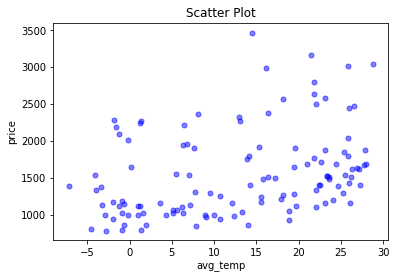

In [265]:
plt.plot(weather["평균기온(℃)"][:-1],price_df["price"],linestyle='none',marker='o',markersize=5, color='blue',alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('avg_temp')
plt.ylabel('price')
plt.show()

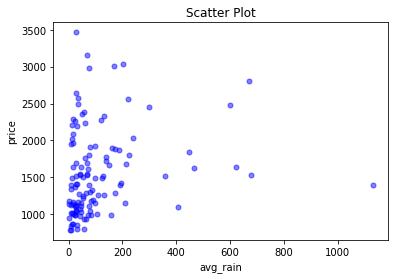

In [267]:
plt.plot(weather["강수량(mm)"][:-1],price_df["price"],linestyle='none',marker='o',markersize=5, color='blue',alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('avg_rain')
plt.ylabel('price')
plt.show()

In [0]:
price_df["평균기온(℃)"] = weather["평균기온(℃)"][:-1].tolist()
price_df["강수량(mm)"] = weather["강수량(mm)"][:-1].tolist()
price_df["합계전천일사량(MJ/㎡)"]=solar["합계전천일사량(MJ/㎡)"][:-1].tolist()
price_df["합계일조시간(hr)"]=solar["합계일조시간(hr)"][:-1].tolist()
price_df["평균풍속(m/s)"]=wind["평균풍속(m/s)"][:-1].tolist()
price_df["최대풍속(m/s)"]=wind["최대풍속(m/s)"][:-1].tolist()

In [0]:
# 기압
col = airpression.columns
for num in range(len(col)):
  if num=='일시':
    continue
  else:
    price_df[col[num]]=airpression[col[num]][:-1].tolist()

In [0]:
# 습도
col = humid.columns
for num in range(len(col)):
  if num=='일시':
    continue
  else:
    price_df[col[num]]=humid[col[num]][:-1].tolist()

In [0]:
price_df.drop(columns="일시", axis=1,inplace=True)

In [360]:
price_df

,price,평균기온(℃),강수량(mm),합계전천일사량(MJ/㎡),합계일조시간(hr),평균풍속(m/s),최대풍속(m/s),평균현지기압(hPa),최고현지기압(hPa),최저현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),평균상대습도(%),최소상대습도(%)
2010-1,798.0,-4.5,29.3,257.47,167.9,2.3,6.9,1013.6,1024.5,997.1,1024.6,1035.7,1007.9,65,26
2010-2,796.0,1.4,55.3,281.04,141.2,2.4,6.6,1010.7,1020.5,995.8,1021.5,1031.6,1006.0,59,14
2010-3,987.0,4.3,82.5,351.10,133.0,2.9,10.2,1009.6,1022.8,983.9,1020.2,1033.6,994.1,59,13
2010-4,1288.0,9.5,62.8,458.41,166.3,2.9,10.9,1007.4,1017.1,991.5,1017.8,1027.9,1001.9,54,12
2010-5,1495.0,17.2,124.0,535.71,178.5,2.6,9.9,1000.6,1010.2,980.9,1010.6,1020.2,990.9,62,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-8,1398.0,27.2,190.5,486.24,239.3,1.6,7.5,996.9,1005.7,981.2,1006.6,1015.6,990.8,69,28
2019-9,1714.0,22.6,139.8,386.78,168.9,2.2,11.8,1004.7,1014.9,978.3,1014.6,1024.9,987.7,65,24
2019-10,2380.0,16.4,55.5,395.43,236.5,2.1,6.7,1008.8,1019.3,992.1,1018.9,1029.6,1002.0,62,23
2019-11,1909.0,7.6,78.8,284.28,203.2,2.2,7.0,1012.2,1023.6,994.4,1022.7,1034.5,1004.7,56,14


In [365]:
col = price_df.columns
for i in range(len(col)-1):
  print("무의 가격과 " + col[i+1] + " 간의 상관계수")
  print(np.corrcoef(price_df['price'], price_df[col[1+i]])[0][1])
  print("*"*30)

무의 가격과 평균기온(℃) 간의 상관계수
0.3534357893805427
******************************
무의 가격과 강수량(mm) 간의 상관계수
0.19829508910200816
******************************
무의 가격과 합계전천일사량(MJ/㎡) 간의 상관계수
0.15336059699076754
******************************
무의 가격과 합계일조시간(hr) 간의 상관계수
-0.058501954716614395
******************************
무의 가격과 평균풍속(m/s) 간의 상관계수
-0.4106232892176223
******************************
무의 가격과 최대풍속(m/s) 간의 상관계수
-0.1601512559792627
******************************
무의 가격과 평균현지기압(hPa) 간의 상관계수
-0.23061578709098135
******************************
무의 가격과 최고현지기압(hPa) 간의 상관계수
-0.19815832408844486
******************************
무의 가격과 최저현지기압(hPa) 간의 상관계수
-0.229233853080986
******************************
무의 가격과 평균해면기압(hPa) 간의 상관계수
-0.23933820625167768
******************************
무의 가격과 최고해면기압(hPa) 간의 상관계수
-0.2040152015995037
******************************
무의 가격과 최저해면기압(hPa) 간의 상관계수
-0.2407796112571197
******************************
무의 가격과 평균상대습도(%) 간의 상관계수
0.28641532092499244
***************************

In [375]:
col

Index(['price', '평균기온(℃)', '강수량(mm)', '합계전천일사량(MJ/㎡)', '합계일조시간(hr)',
       '평균풍속(m/s)', '최대풍속(m/s)', '평균현지기압(hPa)', '최고현지기압(hPa)', '최저현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '평균상대습도(%)', '최소상대습도(%)'],
      dtype='object')

In [0]:
# 그래프로 확인

TypeError: ignored

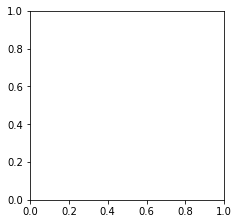

In [374]:
for i in range(len(col)):
  fig = plt.figure(figsize=(16,16))
  plt.subplot(4,4,i+1)
  plt('LSTAT','CMEDV',data=price_df, linestyle='none',marker='o',markersize=5, color='blue',alpha=0.5)
  plt.show()